In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [58]:

# Path to video and image files
image_path = 'input.png'   # Replace with the path to your image
output_image_path = 'output_image.png'

In [59]:
# Display name on video
name_text = "521H0320_LETRI"  # Replace with your name
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 255, 0)
font_thickness = 2
text_position = (10, 30)


In [60]:
# === Task 2: Image processing ===
img = cv2.imread(image_path)  # Read the input image from the specified path
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale


In [61]:
# Get the dimensions of the grayscale image (height and width)
height, width = img_gray.shape

In [62]:
# Split the grayscale image into two halves: top and bottom
top = img_gray[0:height // 2, 0:width]  # The top half of the grayscale image
bottom = img[height // 2:height, 0:width]  # The bottom half in original colo

In [63]:

# Define the left and right part ratios for splitting
left_ratio = 4 / 10  # 40% for the left part
right_ratio = 6 / 10  # 60% for the right par

In [64]:
# Calculate the pixel width for each part based on the ratios
left_width = int(width * left_ratio)  # Width of the left part
right_width = int(width * right_ratio)  # Width of the right part

In [65]:
# Split the bottom half into left and right parts
left_part = bottom[:, :left_width]  # The left section of the bottom half
right_part = bottom[:, left_width:]  # The right section of the bottom half

In [66]:
# Image processing function using a simple threshold
def process_image(part_img, kernel_size=(1, 1)):
    # Apply binary inverse thresholding
    _, th1 = cv2.threshold(part_img, 120, 255, cv2.THRESH_BINARY_INV)

    # Create a kernel for morphological operations
    kernel = np.ones(kernel_size, np.uint8)
    
    # Apply morphological opening to remove small noises
    img_open = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel)
    
    # Apply morphological closing to fill gaps
    img_close = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, kernel)
    
    # Find contours in the processed image
    contours, _ = cv2.findContours(img_close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Convert the original part image to color for drawing
    processed_part = cv2.cvtColor(part_img, cv2.COLOR_GRAY2BGR)

    # Loop through each contour to draw bounding boxes
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)  # Get the bounding box for each contour
        if 9 < w < 200 and 30 < h < 200:  # Filter contours by width and height
            cv2.rectangle(processed_part, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green rectangle

    return processed_part

In [67]:
# Function to detect digits and draw boxes using a simple threshold
def process_image_1(image, kernel_size=(1, 1)):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, thres = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)  # Apply binary inverse threshold

    kernel = np.ones(kernel_size, np.uint8)
    closing = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, kernel)  # Apply morphological closing

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Loop through contours to draw bounding boxes
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)  # Get the bounding box for each contour
        if 9 < w < 200 and 30 < h < 200:  # Filter based on size
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green rectangle

    return image


In [68]:
# Another image processing function using a different threshold value
def process_image_2(image, kernel_size=(1, 1)):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, thres = cv2.threshold(img_gray, 20, 255, cv2.THRESH_BINARY_INV)  # Apply binary inverse threshold

    kernel = np.ones(kernel_size, np.uint8)
    closing = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, kernel)  # Apply morphological closing

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Loop through contours to draw bounding boxes
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)  # Get the bounding box for each contour
        if 9 < w < 200 and 30 < h < 200:  # Filter based on size
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green rectangle

    return image

In [69]:
# Process each part of the image with different functions
processed_top = process_image(top)  # Process the top part using the first function
processed_left_part = process_image_1(left_part)  # Process the left part using the second function
processed_right_part = process_image_2(right_part)  # Process the right part using the third function


In [70]:
# Combine the processed images into a final result
final_result = np.vstack((processed_top, np.hstack((processed_left_part, processed_right_part))))



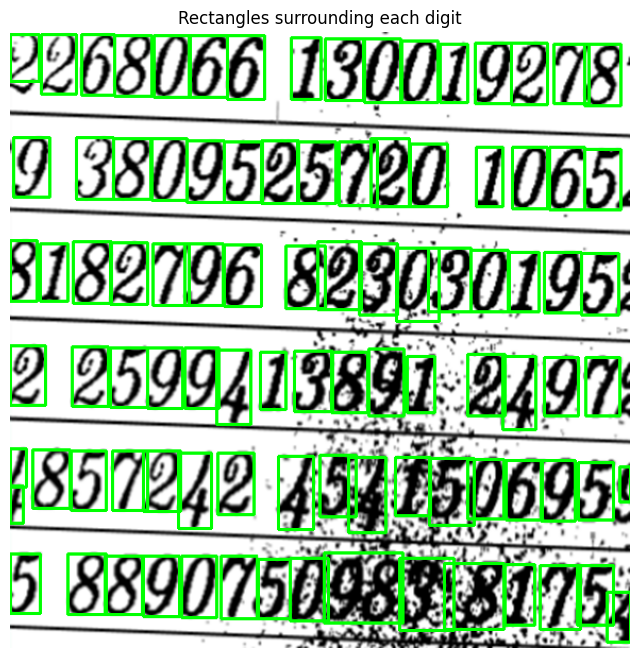

In [71]:
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Rectangles surrounding each digit")
plt.show()